In [11]:
import pandas as pd
import numpy as np

data1 = pd.read_excel('Batch_Div27_Class8_2_Results_metrics_BEV.xlsx',index_col=None)
data2 = pd.read_excel('Div27_Class6_1_Results_metrics_BEV.xlsx',index_col=None)
data = pd.concat([data1, data2])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 0 to 1139
Columns: 104 entries, RunId-none to Characteristic Acceleration-mph/s
dtypes: float64(77), int64(21), object(6)
memory usage: 3.1+ MB


In [12]:
data = data.drop(['Characteristic Acceleration-mph/s'],axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 0 to 1139
Columns: 103 entries, RunId-none to Accessory work-kJ
dtypes: float64(76), int64(21), object(6)
memory usage: 3.1+ MB


In [13]:
data_learn0 = data[['Vehicle Model-none','Battery Energy Consumption per Mile-kWh/mi',\
#                        'Battery Energy Consumption-kWh',\
                    'Vehicle Static Mass-lbm',\
                    'Cargo Mass-lbm',\
                    'Frontal area of the vehicle-m^2',\
                    'Distance Travelled-mi',\
                    'Initial SOC-%',\
                    'Average Moving (Without Idle) Speed-mph',\
                    'Standard Deviation of Moving Speed-mph',
                    'Average Grade-%',\
                    'Average Grade Ascent-%',\
                    'Average Grade Descent-%',\
                    'Average Total Speed-mph',\
                    'Standard Deviation of Speed-mph',\
                    'Aerodynamic Speed-mph',\
                    'Characteristic Acceleration-m/s2',\
                    'Characteristic Acceleration Without Grade-m/s2']]
data_learn = pd.get_dummies(data_learn0,drop_first=True)
data_learn

Battery Energy Consumption per Mile-kWh/mi  Vehicle Static Mass-lbm  \
0                                       1.668647             35048.016720   
1                                       1.668350             35048.016720   
2                                       1.670148             35048.016720   
3                                       1.865797             48947.953227   
4                                       1.865496             48947.953227   
...                                          ...                      ...   
1135                                    1.207743             23678.989047   
1136                                    1.325732             23678.989047   
1137                                    1.248833             26000.017637   
1138                                    1.252308             26000.017637   
1139                                    1.376107             26000.017637   

      Cargo Mass-lbm  Frontal area of the vehicle-m^2  Distance Travelled-mi  \
0           0.000000                          10.0684             118.345866   
1           0.000000                          10.0684             118.345866   
2           0.000000                          10.0684             118.345866   
3           0.000000                          10.0684             118.346591   
4           0.000000                          10.0684             118.346591   
...              ...                              ...                    ...   
1135     6963.967618                           6.8748             100.052878   
1136     6963.967618                           6.8748              39.814122   
1137     9284.996208                           6.8748             143.765904   
1138     9284.996208                           6.8748              96.482007   
1139     9284.996208                           6.8748              38.345660   

      Initial SOC-%  Average Moving (Without Idle) Speed-mph  \
0                90                                45.863532   
1                65                                45.863532   
2                40                                45.863532   
3                90                                45.776859   
4                65                                45.776859   
...             ...                                      ...   
1135             65                                50.273748   
1136             40                                46.759587   
1137             90                                49.268972   
1138             65                                50.209869   
1139             40                                46.450353   

      Standard Deviation of Moving Speed-mph  Average Grade-%  \
0                                  16.510600        -0.026099   
1                                  16.510600        -0.026099   
2                                  16.510600        -0.026099   
3                                  16.637815        -0.026259   
4                                  16.637815        -0.026259   
...                                      ...              ...   
1135                               10.730636        -0.009927   
1136                               15.004970         0.057050   
1137                               11.413812        -0.009135   
1138                               10.890494        -0.017512   
1139                               15.139040         0.049751   

      Average Grade Ascent-%  Average Grade Descent-%  \
0                   0.952886                 0.965510   
1                   0.952886                 0.965510   
2                   0.952886                 0.965510   
3                   0.952920                 0.966109   
4                   0.952920                 0.966109   
...                      ...                      ...   
1135                0.845730                 0.831286   
1136                0.883199                 0.846085   
1137                0.875291                 0.841773   


In [5]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, axs = plt.subplots(4,4,figsize=[25, 20])

axs[0, 0].scatter(data_learn.iloc[:,1], data_learn.iloc[:,0])
axs[0, 0].set_xlabel("Vehicle Static Mass-lbm")
axs[0, 0].set_ylabel("Energy_Consumption_kWh_per_mi")

axs[0, 1].scatter(data_learn.iloc[:,2], data_learn.iloc[:,0])
axs[0, 1].set_xlabel("Cargo Mass-lbm")

axs[0, 2].scatter(data_learn.iloc[:,3], data_learn.iloc[:,0])
axs[0, 2].set_xlabel("Frontal area of the vehicle-m^2")

axs[0, 3].scatter(data_learn.iloc[:,4], data_learn.iloc[:,0])
axs[0, 3].set_xlabel("Distance Travelled-mi")

axs[1, 0].scatter(data_learn.iloc[:,5], data_learn.iloc[:,0])
axs[1, 0].set_xlabel("Initial_SOC")
axs[1, 0].set_ylabel("Energy_Consumption_kWh_per_mi")

axs[1, 1].scatter(data_learn.iloc[:,6], data_learn.iloc[:,0])
axs[1, 1].set_xlabel("Average Moving (Without Idle) Speed-mph")

axs[1, 2].scatter(data_learn.iloc[:,7], data_learn.iloc[:,0])
axs[1, 2].set_xlabel("Standard Deviation of Moving Speed-mph")

axs[1, 3].scatter(data_learn.iloc[:,8], data_learn.iloc[:,0])
axs[1, 3].set_xlabel("Average Grade-%")

axs[2, 0].scatter(data_learn.iloc[:,9], data_learn.iloc[:,0])
axs[2, 0].set_xlabel("Average Grade Ascent-%")
axs[2, 0].set_ylabel("Energy_Consumption_kWh_per_mi")


axs[2, 1].scatter(data_learn.iloc[:,10], data_learn.iloc[:,0])
axs[2, 1].set_xlabel("Average Grade Descent-%")

axs[2, 2].scatter(data_learn.iloc[:,11], data_learn.iloc[:,0])
axs[2, 2].set_xlabel("Average Total Speed-mph")

axs[2, 3].scatter(data_learn.iloc[:,12], data_learn.iloc[:,0])
axs[2, 3].set_xlabel("Standard Deviation of Speed-mph")

axs[3, 0].scatter(data_learn.iloc[:,13], data_learn.iloc[:,0])
axs[3, 0].set_xlabel("Aerodynamic Speed-mph")
axs[3, 0].set_ylabel("Energy_Consumption_kWh_per_mi")


axs[3, 1].scatter(data_learn.iloc[:,14], data_learn.iloc[:,0])
axs[3, 1].set_xlabel("Characteristic Acceleration-m/s2")

axs[3, 2].scatter(data_learn.iloc[:,15], data_learn.iloc[:,0])
axs[3, 2].set_xlabel("Characteristic Acceleration Without Grade-m/s2")

# axs[2, 3].scatter(data_learn.iloc[:,16], data_learn.iloc[:,0])
# axs[2, 3].set_xlabel("Standard Deviation of Speed-mph")


Text(0.5, 0, 'Characteristic Acceleration Without Grade-m/s2')

In [14]:
X = data_learn.iloc[:,1:16]
y = data_learn.iloc[:,0:1]

In [15]:
y

Battery Energy Consumption per Mile-kWh/mi
0                                       1.668647
1                                       1.668350
2                                       1.670148
3                                       1.865797
4                                       1.865496
...                                          ...
1135                                    1.207743
1136                                    1.325732
1137                                    1.248833
1138                                    1.252308
1139                                    1.376107

[3876 rows x 1 columns]

In [ ]:
Task: 
    Create a lookup table for the linear cost constants (a, b), 
    and save it as a csv of pickle file
input:
    - bool freight = Are we using 
    - double m is the freight mass
    - int i is the node that the vehiecle is departing from
    - int j is the node that the vehiecle's destination is 
    - int k is the identification number of the vehiecle
returns:
    - (a, b) as the results of linear regression from the data
    - 1. am+b, m 是 freight mass, a_ijk, b_ijk
    - 2. am+b, m 是 vehicle mass, a_ijk, b_ij
    
def getCostConstants(freight = True, m, i, j, k):
    if freight:
        # case where m = freight mass
        
        
    else:
        # case where m = vehicle mass
                

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [17]:
dum = data_learn.iloc[:,16:].reset_index(drop=True)
dum.columns = ['Class8_bev_2021_daycab_regionalhaul','Class8_bev_2021_low_sleeper_longhaul']
X_scale_df = pd.DataFrame(X_scaled)
X_scale_df.columns=X.columns
X_scaled = pd.concat([X_scale_df,dum],axis=1)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876 entries, 0 to 3875
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Vehicle Static Mass-lbm                         3876 non-null   float64
 1   Cargo Mass-lbm                                  3876 non-null   float64
 2   Frontal area of the vehicle-m^2                 3876 non-null   float64
 3   Distance Travelled-mi                           3876 non-null   float64
 4   Initial SOC-%                                   3876 non-null   float64
 5   Average Moving (Without Idle) Speed-mph         3876 non-null   float64
 6   Standard Deviation of Moving Speed-mph          3876 non-null   float64
 7   Average Grade-%                                 3876 non-null   float64
 8   Average Grade Ascent-%                          3876 non-null   float64
 9   Average Grade Descent-%                  

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_scaled, y_scaled, test_size=0.2)
train = pd.concat([X_train.reset_index(drop=True),pd.DataFrame(y_train,columns = ['Energy_Consumption_kWh_per_mi'])],axis=1)
train

Vehicle Static Mass-lbm  Cargo Mass-lbm  \
0                    0.110041        0.141668   
1                    0.631999        0.157921   
2                    1.000000        1.000000   
3                    0.805815        0.749987   
4                    0.631999        0.157921   
...                       ...             ...   
3095                 0.509329        0.000000   
3096                 0.036676        0.047217   
3097                 0.110041        0.141668   
3098                 0.611630        0.499991   
3099                 0.033624        0.000000   

      Frontal area of the vehicle-m^2  Distance Travelled-mi  Initial SOC-%  \
0                                 0.0               0.481454            0.5   
1                                 1.0               0.004224            0.0   
2                                 1.0               0.305320            0.5   
3                                 1.0               0.442828            0.5   
4                                 1.0               0.330107            1.0   
...                               ...                    ...            ...   
3095                              1.0               0.590104            1.0   
3096                              0.0               0.482596            1.0   
3097                              0.0               0.151540            0.0   
3098                              1.0               0.157754            0.0   
3099                              1.0               0.637078            0.5   

      Average Moving (Without Idle) Speed-mph  \
0                                    0.711096   
1                                    0.223824   
2                                    0.770078   
3                                    0.647718   
4                                    0.606345   
...                                       ...   
3095                                 0.880786   
3096                                 0.704087   
3097                                 0.970757   
3098                                 0.434024   
3099                                 0.714684   

      Standard Deviation of Moving Speed-mph  Average Grade-%  \
0                                   0.297372         0.278440   
1                                   0.277837         0.326321   
2                                   0.522050         0.368854   
3                                   0.519835         0.504841   
4                                   0.525929         0.511163   
...                                      ...              ...   
3095                                0.363704         0.318752   
3096                                0.481089         0.360763   
3097                                0.055497         0.439317   
3098                                0.758818         0.583558   
3099                                0.619614         0.397421   

      Average Grade Ascent-%  Average Grade Descent-%  \
0                   0.385850                 0.479668   
1                   0.192694                 0.005832   
2                   0.429152                 0.629347   
3                   0.248335                 0.414187   
4                   0.193736                 0.550068   
...                      ...                      ...   
3095                0.450637                 0.615664   
3096                0.498453                 0.471280   
3097                0.545368                 0.716419   
3098                0.348454                 0.515703   
3099                0.355017                 0.567229   

      Average Total Speed-mph  Standard Deviation of Speed-mph  \
0                    0.660235                         0.531729   
1                    0.140490                         0.475568   
2                    0.718168                         0.693833   
3                    0.602774                         0.677118   
4                    0.523101                         0.742860   
...              

In [19]:
data_learn

Battery Energy Consumption per Mile-kWh/mi  Vehicle Static Mass-lbm  \
0                                       1.668647             35048.016720   
1                                       1.668350             35048.016720   
2                                       1.670148             35048.016720   
3                                       1.865797             48947.953227   
4                                       1.865496             48947.953227   
...                                          ...                      ...   
1135                                    1.207743             23678.989047   
1136                                    1.325732             23678.989047   
1137                                    1.248833             26000.017637   
1138                                    1.252308             26000.017637   
1139                                    1.376107             26000.017637   

      Cargo Mass-lbm  Frontal area of the vehicle-m^2  Distance Travelled-mi  \
0           0.000000                          10.0684             118.345866   
1           0.000000                          10.0684             118.345866   
2           0.000000                          10.0684             118.345866   
3           0.000000                          10.0684             118.346591   
4           0.000000                          10.0684             118.346591   
...              ...                              ...                    ...   
1135     6963.967618                           6.8748             100.052878   
1136     6963.967618                           6.8748              39.814122   
1137     9284.996208                           6.8748             143.765904   
1138     9284.996208                           6.8748              96.482007   
1139     9284.996208                           6.8748              38.345660   

      Initial SOC-%  Average Moving (Without Idle) Speed-mph  \
0                90                                45.863532   
1                65                                45.863532   
2                40                                45.863532   
3                90                                45.776859   
4                65                                45.776859   
...             ...                                      ...   
1135             65                                50.273748   
1136             40                                46.759587   
1137             90                                49.268972   
1138             65                                50.209869   
1139             40                                46.450353   

      Standard Deviation of Moving Speed-mph  Average Grade-%  \
0                                  16.510600        -0.026099   
1                                  16.510600        -0.026099   
2                                  16.510600        -0.026099   
3                                  16.637815        -0.026259   
4                                  16.637815        -0.026259   
...                                      ...              ...   
1135                               10.730636        -0.009927   
1136                               15.004970         0.057050   
1137                               11.413812        -0.009135   
1138                               10.890494        -0.017512   
1139                               15.139040         0.049751   

      Average Grade Ascent-%  Average Grade Descent-%  \
0                   0.952886                 0.965510   
1                   0.952886                 0.965510   
2                   0.952886                 0.965510   
3                   0.952920                 0.966109   
4                   0.952920                 0.966109   
...                      ...                      ...   
1135                0.845730                 0.831286   
1136                0.883199                 0.846085   
1137                0.875291                 0.841773   


In [40]:
# Think there are conversions over here 
# Kg --> lbs * 2.2
# lbs --> Kg * 0.453592
train0 = pd.DataFrame(data_learn.iloc[:,1:3])*0.453592
# train0 = pd.DataFrame(data_learn.iloc[:,1:2])*0.453592
# train0.columns = ['Vehiecle Mass_kg','CargoMass_kg']
train0.columns = ['Mass_kg']
train0['Energy_kwh_km'] = data_learn.iloc[:,0]/1.60934

In [41]:
train0

Mass_kg  Energy_kwh_km
0     15897.5       1.036852
1     15897.5       1.036667
2     15897.5       1.037784
3     22202.4       1.159356
4     22202.4       1.159168
...       ...            ...
1135  10740.6       0.750459
1136  10740.6       0.823774
1137  11793.4       0.775991
1138  11793.4       0.778150
1139  11793.4       0.855075

[3876 rows x 2 columns]

## ML model building

### The original LR model - All features

In [42]:
#LR model
import statsmodels.formula.api as smf
import statsmodels.api as sm
# fit the data to the model
# X_train1 = sm.add_constant(X_train)
# LR = sm.OLS(y_train, X_train1).fit()

LR = smf.ols(formula='Energy_kwh_km ~ Mass_kg ',data=train0).fit()
print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:          Energy_kwh_km   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.088e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        11:09:57   Log-Likelihood:                 3653.4
No. Observations:                3876   AIC:                            -7303.
Df Residuals:                    3874   BIC:                            -7290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5607      0.003    163.047      0.0

In [44]:
LR.params

Intercept    0.560676
Mass_kg      0.000027
dtype: float64

In [14]:
def OSR2(model, X_train, X_test, y_train, y_test):   
    y_pred = model.predict(sm.add_constant(X_test))
    SSE = np.sum((y_test.ravel()- y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)    
    return 1 - SSE/SST
OSR2(LR, X_train1, X_test, y_train, y_test)

NameError: name 'X_train1' is not defined

### The original LR model - 5 features by ETR

In [ ]:
X_train1

const  Vehicle Static Mass-lbm  Cargo Mass-lbm  \
1736    1.0                 0.417445        0.249996   
1745    1.0                 1.000000        1.000000   
76      1.0                 0.509329        0.000000   
753     1.0                 1.000000        0.631689   
2408    1.0                 0.805815        0.749987   
...     ...                      ...             ...   
3189    1.0                 0.036676        0.047217   
2548    1.0                 0.611630        0.499991   
79      1.0                 0.631999        0.157921   
203     1.0                 0.509329        0.000000   
1873    1.0                 0.033624        0.000000   

      Frontal area of the vehicle-m^2  Distance Travelled-mi  Initial SOC-%  \
1736                              1.0               0.219654            0.0   
1745                              1.0               0.145328            0.0   
76                                1.0               0.471080            0.5   
753                               1.0               0.216120            1.0   
2408                              1.0               0.152636            0.0   
...                               ...                    ...            ...   
3189                              0.0               0.418224            1.0   
2548                              1.0               0.452902            0.5   
79                                1.0               0.471086            0.5   
203                               1.0               0.734861            0.0   
1873                              1.0               0.305280            0.5   

      Average Moving (Without Idle) Speed-mph  \
1736                                 0.616518   
1745                                 0.441003   
76                                   0.731083   
753                                  0.692896   
2408                                 0.516576   
...                                       ...   
3189                                 0.675348   
2548                                 0.955730   
79                                   0.727280   
203                                  0.638997   
1873                                 0.778523   

      Standard Deviation of Moving Speed-mph  Average Grade-%  \
1736                                0.461687         0.295057   
1745                                0.728144         0.325872   
76                                  0.330356         0.436095   
753                                 0.417056         0.491077   
2408                                0.758234         0.552972   
...                                      ...              ...   
3189                                0.518954         0.418367   
2548                                0.166862         0.539668   
79                                  0.331834         0.434129   
203                                 0.570963         0.436279   
1873                                0.515937         0.375974   

      Average Grade Ascent-%  Average Grade Descent-%  \
1736                0.464016                 0.262890   
1745                0.504498                 0.301252   
76                  0.334502                 0.424488   
753                 0.369127                 0.396403   
2408                0.321856                 0.554451   
...                      ...                      ...   
3189                0.563063                 0.541326   
2548                0.172388                 0.434056   
79                  0.334603                 0.426869   
203                 0.396885                 0.608949   
1873                0.433845                 0.625594   

      Average Total Speed-mph  Standard Deviation of Speed-mph  \
1736                 0.540324                         0.689255   
1745                 0.400364                         0.814980   
76                   0.706527                         0.481412   
753                  0.649703                         0.596815   

In [ ]:
X_train2 = X_train1[['Vehicle Static Mass-lbm','Frontal area of the vehicle-m^2',\
                     'Cargo Mass-lbm','Aerodynamic Speed-mph','Standard Deviation of Speed-mph']]

#X_train1.drop(['Standard Deviation of Moving Speed-mph'], axis=1)
LR = sm.OLS(y_train, sm.add_constant(X_train2)).fit()

print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.829e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:53:15   Log-Likelihood:                 5498.6
No. Observations:                3100   AIC:                        -1.099e+04
Df Residuals:                    3094   BIC:                        -1.095e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
X_test2 =  X_test[['Vehicle Static Mass-lbm','Frontal area of the vehicle-m^2',\
                     'Cargo Mass-lbm','Aerodynamic Speed-mph','Standard Deviation of Speed-mph']]
OSR2(LR, X_train2, X_test2, y_train, y_test)

0.9665590888963486

### The original LR model - 3 PCA components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X_train)
X_train3=pca.transform(X_train)
X_test3=pca.transform(X_test)
X_test3.shape

(776, 5)

In [ ]:
LR3 = sm.OLS(y_train, sm.add_constant(X_train3)).fit()
print(LR3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.585e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:03:35   Log-Likelihood:                 5284.3
No. Observations:                3100   AIC:                        -1.056e+04
Df Residuals:                    3094   BIC:                        -1.052e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3987      0.001    504.063      0.0

In [ ]:
OSR2(LR3, X_train3, X_test3, y_train, y_test)

0.9608631586454567

### Decision Tree Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101),
               'min_samples_leaf': [5,10,20],
               'min_samples_split': [5,10,20],
               'max_depth': [10,20], # too large??
               'random_state': [88]} 
            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtr_cv_acc.fit(X_train2, y_train)

Fitting 10 folds for each of 1818 candidates, totalling 18180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 18180 out of 18180 | elapsed:  1.9min finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038,...
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099, 0.01  ]),
                         'max_depth': [10, 20], 'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'random_state': [88]},
             scoring='r2', verbose=1

In [ ]:
print(dtr_cv_acc.best_params_)
print('Grid best score (r2): ', dtr_cv_acc.best_score_)

{'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 88}
Grid best score (r2):  0.9920353149574626


In [ ]:
#Build DTR base on the ccp determined by CV
dtr = DecisionTreeRegressor(min_samples_split=5, 
                            min_samples_leaf =5,
                            ccp_alpha=0,
                            max_depth = 10,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)
dtr.score(X_test2, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 17 and input n_features is 5 

Node count = 721


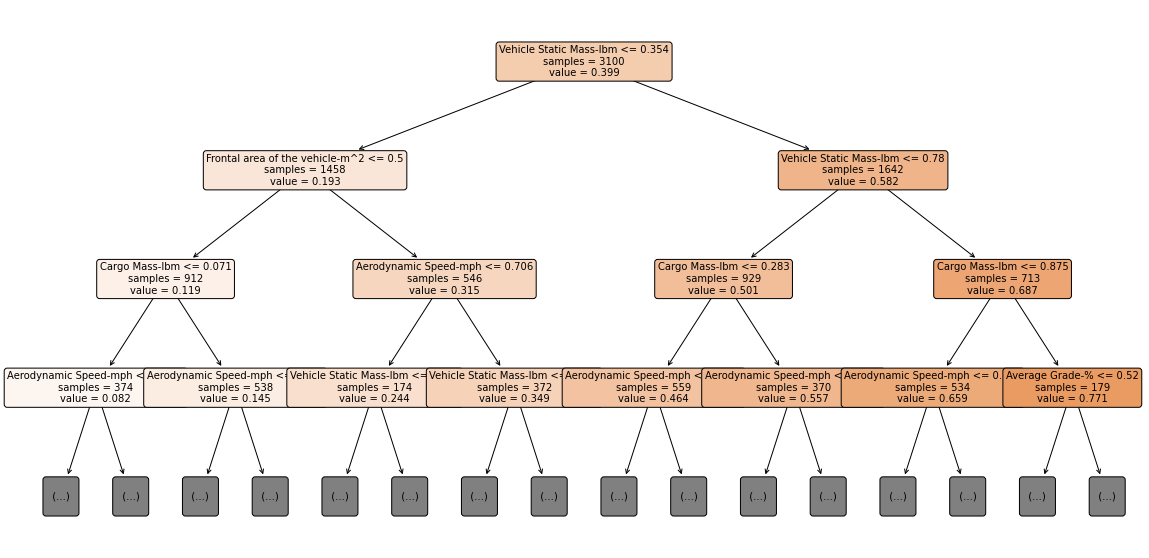

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(20,10))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.show()

##### Key Features:
* Vehicle Static Mass
* Frontal area of the vehicle
* Aerodynamic Speed
* Cargo Mass

##### Some findings:
* The total mass is more important than cargo & vehicle mass (seperately). 
* Class 6 and Class 8 have differnt energy consumption efficiency. 

"Heavy-duty trucks (Class 7 and 8) consume more than four times the energy used to operate smaller and lighter trucks (Class 3-6 trucks, including those used for the last-mile delivery" (Davis and Boundy 2019))

In [ ]:
data_learn1 = data_learn0.replace({'Vehicle Model-none' :\
                     {'class8_bev_2021_low_sleeper_longhaul_FU19': 'Class8_Sleeper', \
                     'class8_bev_2021_daycab_regionalhaul_FU19': 'Class8_Daycab', \
                     'class6_bev_2021_low_medium_box_FU19':'Class6_Medium_box'}})

Text(0.5, 0, 'Vehicle Type')

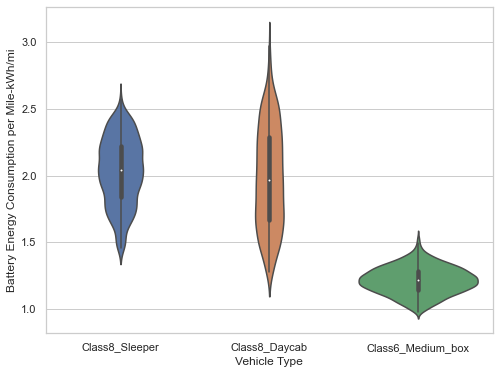

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6),\
            "font.size":10},style="whitegrid")
ax = sns.violinplot(x="Vehicle Model-none", y="Battery Energy Consumption per Mile-kWh/mi", \
                    data=data_learn1)
ax.set_xlabel('Vehicle Type')

In [ ]:
#Build DTR with fewer nodes and smaller depth
dtr1 = DecisionTreeRegressor(#min_samples_split=5, 
                            min_samples_leaf =50,
                            ccp_alpha=0,
                            max_depth = 5,
                            random_state = 88)
dtr1 = dtr1.fit(X_train, y_train)
dtr1.score(X_test, y_test)

0.974739206247341

Node count = 59


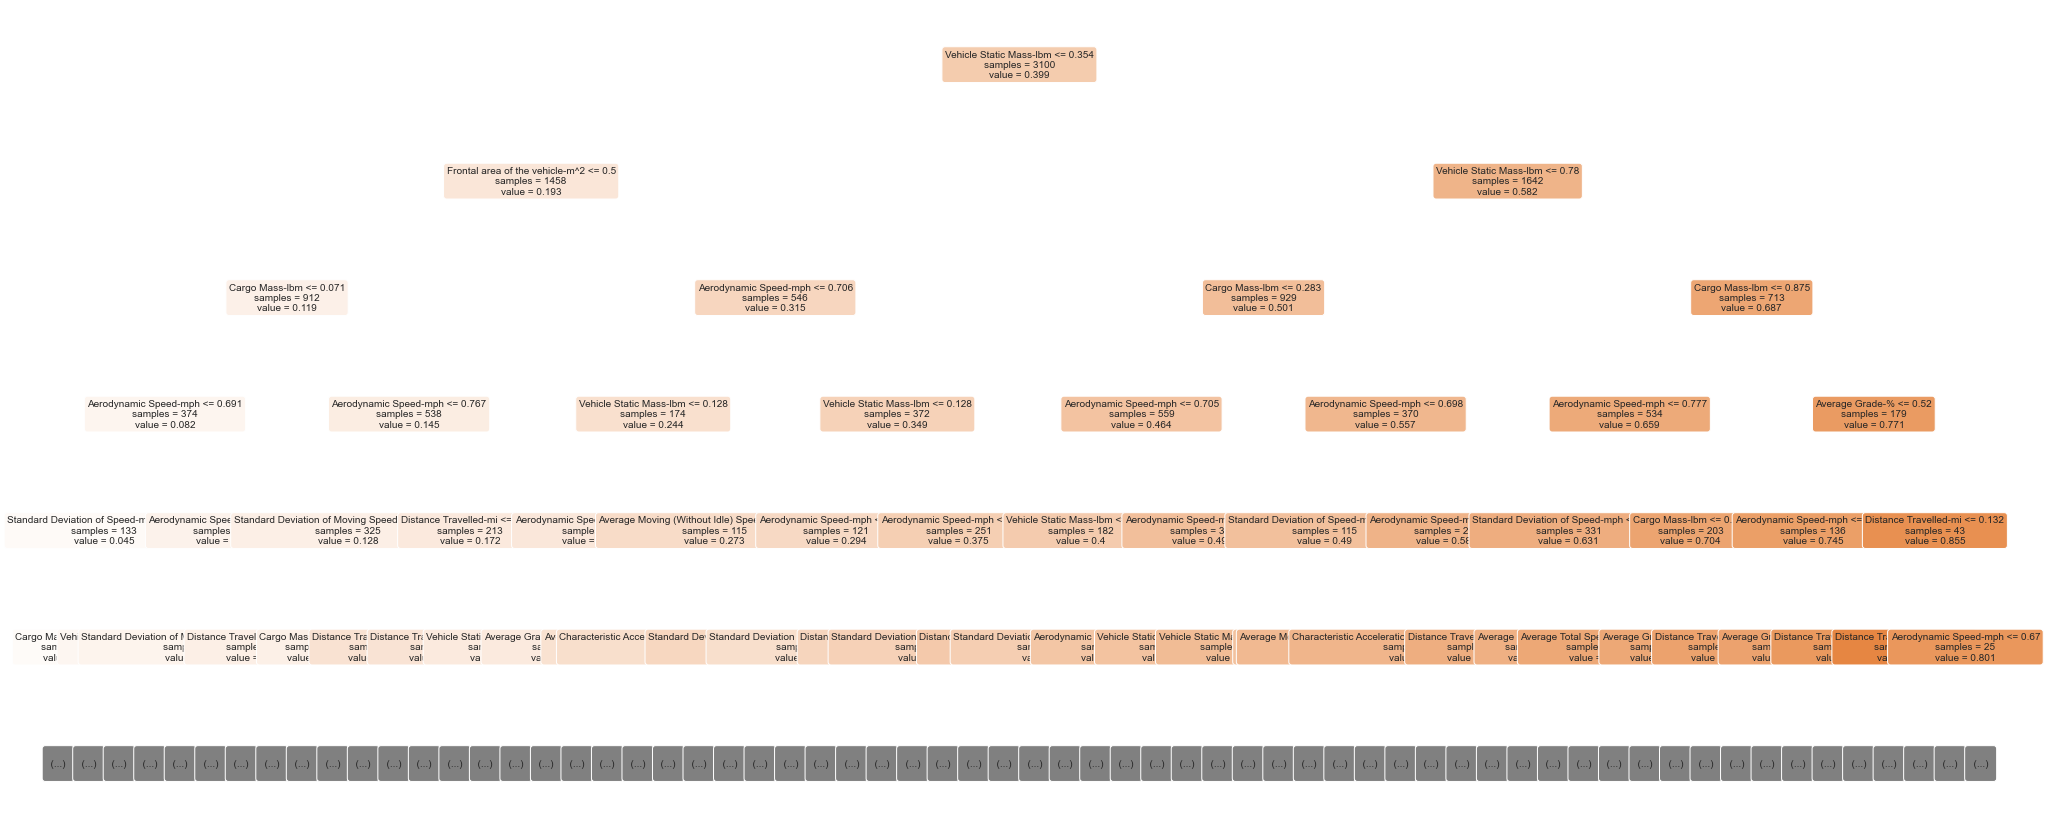

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtr1.tree_.node_count)
plt.figure(figsize=(35,15))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth=5)
plt.show()

##### Key Features:
* Vehicle Static Mass
* Frontal area of the vehicle
* Aerodynamic Speed
* Cargo Mass
* Average Grade/Descent

### Feature Selection

In [ ]:
train

Vehicle Static Mass-lbm  Cargo Mass-lbm  \
0                    0.417445        0.249996   
1                    1.000000        1.000000   
2                    0.509329        0.000000   
3                    1.000000        0.631689   
4                    0.805815        0.749987   
...                       ...             ...   
3095                 0.036676        0.047217   
3096                 0.611630        0.499991   
3097                 0.631999        0.157921   
3098                 0.509329        0.000000   
3099                 0.033624        0.000000   

      Frontal area of the vehicle-m^2  Distance Travelled-mi  Initial SOC-%  \
0                                 1.0               0.219654            0.0   
1                                 1.0               0.145328            0.0   
2                                 1.0               0.471080            0.5   
3                                 1.0               0.216120            1.0   
4                                 1.0               0.152636            0.0   
...                               ...                    ...            ...   
3095                              0.0               0.418224            1.0   
3096                              1.0               0.452902            0.5   
3097                              1.0               0.471086            0.5   
3098                              1.0               0.734861            0.0   
3099                              1.0               0.305280            0.5   

      Average Moving (Without Idle) Speed-mph  \
0                                    0.616518   
1                                    0.441003   
2                                    0.731083   
3                                    0.692896   
4                                    0.516576   
...                                       ...   
3095                                 0.675348   
3096                                 0.955730   
3097                                 0.727280   
3098                                 0.638997   
3099                                 0.778523   

      Standard Deviation of Moving Speed-mph  Average Grade-%  \
0                                   0.461687         0.295057   
1                                   0.728144         0.325872   
2                                   0.330356         0.436095   
3                                   0.417056         0.491077   
4                                   0.758234         0.552972   
...                                      ...              ...   
3095                                0.518954         0.418367   
3096                                0.166862         0.539668   
3097                                0.331834         0.434129   
3098                                0.570963         0.436279   
3099                                0.515937         0.375974   

      Average Grade Ascent-%  Average Grade Descent-%  \
0                   0.464016                 0.262890   
1                   0.504498                 0.301252   
2                   0.334502                 0.424488   
3                   0.369127                 0.396403   
4                   0.321856                 0.554451   
...                      ...                      ...   
3095                0.563063                 0.541326   
3096                0.172388                 0.434056   
3097                0.334603                 0.426869   
3098                0.396885                 0.608949   
3099                0.433845                 0.625594   

      Average Total Speed-mph  Standard Deviation of Speed-mph  \
0                    0.540324                         0.689255   
1                    0.400364                         0.814980   
2                    0.706527                         0.481412   
3                    0.649703                         0.596815   
4                    0.466598                         0.860227   
...              

#### ExtraTreesRegressor

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
ETR = ExtraTreesRegressor()

ETR = ETR.fit(X_train, y_train)
# display the relative importance of each attribute

impo_score = pd.DataFrame(ETR.feature_importances_.reshape(1,-1))
impo_score.columns = X_train.columns
impo_score= impo_score.T
impo_score.columns = ['Importance']
impo_score.sort_values(by ='Importance',ascending = False)

<ipython-input-22-5ae81221774d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETR = ETR.fit(X_train, y_train)


Importance
Vehicle Static Mass-lbm                           0.458744
Frontal area of the vehicle-m^2                   0.389449
Cargo Mass-lbm                                    0.087107
Aerodynamic Speed-mph                             0.023929
Standard Deviation of Speed-mph                   0.005754
Average Grade-%                                   0.005140
Average Moving (Without Idle) Speed-mph           0.004452
Class8_bev_2021_daycab_regionalhaul               0.004135
Characteristic Acceleration Without Grade-m/s2    0.003751
Standard Deviation of Moving Speed-mph            0.003590
Characteristic Acceleration-m/s2                  0.003031
Average Total Speed-mph                           0.002654
Distance Travelled-mi                             0.002351
Class8_bev_2021_low_sleeper_longhaul              0.002124
Initial SOC-%                                     0.001451
Average Grade Descent-%                           0.001258
Average Grade Ascent-%                            0.001079

##### [Mass] Vehicle Static Mass-lbm	0.489968
Vehicle Mass + Cargo mass 

##### [Vehicle type] Frontal area of the vehicle-m^2	0.367153

Only two frontal areas - 10.07/6.87 m2

This reprensents vehicle type.

#####  [Mass] Cargo Mass-lbm	0.079442
Vehicle Mass + Cargo mass 


##### [Speed]  Aerodynamic Speed-mph	0.023736


##### [Speed]  Standard Deviation of Speed-mph	0.005576


##### [Road info] Average Grade-%	0.005365

From the physical meaning of this feature, it is substitute by **Average Grade Descent %** and **Average Grade Ascent %**. 


##### [Speed]  Average Moving (Without Idle) Speed-mph	0.004692


##### [Vehicle type] Class8_bev_2021_daycab_regionalhaul	0.004032


##### [Speed] Standard Deviation of Moving Speed-mph	0.003495


##### [Speed] Characteristic Acceleration Without Grade-m/s2	0.003359

The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

#### PCA

<ipython-input-23-34c46aa606b4>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


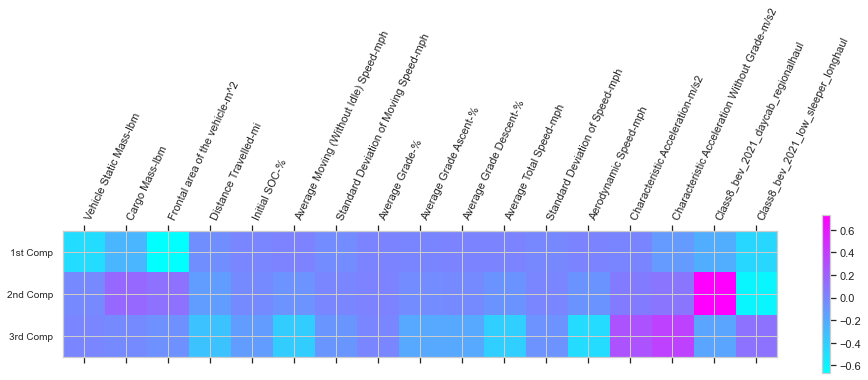

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

plt.matshow(pca.components_,cmap='cool')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_scaled.columns)),X_scaled.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

array([[-0.26689898, -0.73784994, -0.19574477],
       [-0.26504728, -0.7246317 , -0.1333842 ],
       [-0.26319558, -0.71141347, -0.07102364],
       ...,
       [ 0.88906712, -0.24225956, -0.34957875],
       [ 0.9044119 , -0.2020065 , -0.22592583],
       [ 0.88860695, -0.10144886,  0.11217976]])

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.2807006  0.24673734 0.19778211]
[40.1249278  37.61924167 33.68108646]


**The first + second component - vehicle mass and vehicle type.**

**The third component - speed related features.**

<ipython-input-25-fbcf95e43b14>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


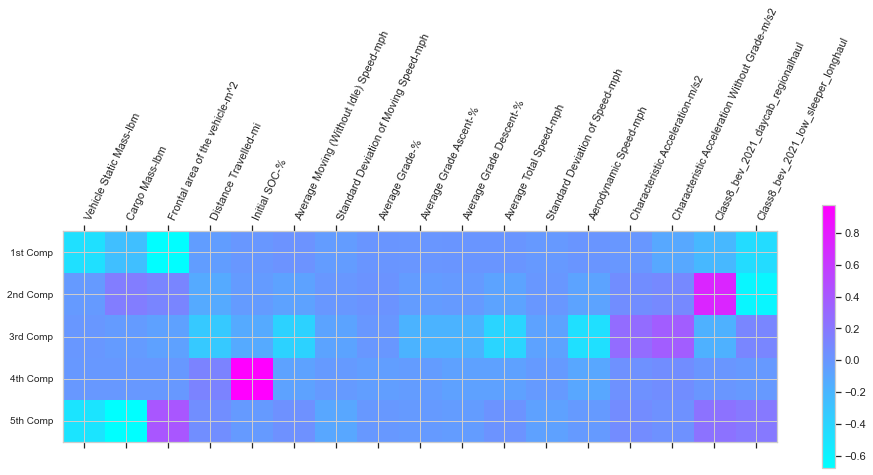

In [ ]:
pca = PCA(n_components=5)
X_pca1=pca.fit_transform(X_scaled)

plt.matshow(pca.components_,cmap='cool')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

**The first + second + fifth component - vehicle mass and vehicle type.**

**The third component - speed related features.**

**The fourth component - battery related features.**

### What if: Select features from all the data available?

There are too many data. The first round selection is based on:

* their physical importance in vehicle model;
* data that can be archieved before each run. 


### Can: "Aerodynamic Speed" and "Characteristic Acceleration" capture by -  

$$ \int V^3 dt $$
$$ \int V^2 dt $$

This would make it easier (less coefficient to estimate) when we try to apply experimental data. 

Currently, no cycle data was available.

Would it be an interesting perspective?

In [ ]:
data_learn_v = data_learn.drop(['Aerodynamic Speed-mph','Characteristic Acceleration-m/s2','Characteristic Acceleration Without Grade-m/s2'])
data_learn_v

KeyError: "['Aerodynamic Speed-mph' 'Characteristic Acceleration-m/s2'\n 'Characteristic Acceleration Without Grade-m/s2'] not found in axis"

### Some other models

In [ ]:
from xgboost import XGBRegressor
# D_train = xgb.DMatrix(X_train, label=y_train)
# D_test = xgb.DMatrix(X_test, label=y_test)
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
## from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
np.average(scores)

0.999558009006196

* ML model for vehicle energy consumption prediction works well with simulation data. 
* Network model with nodes and edges?
* MC - generated cycles
* HERE API

### Plot

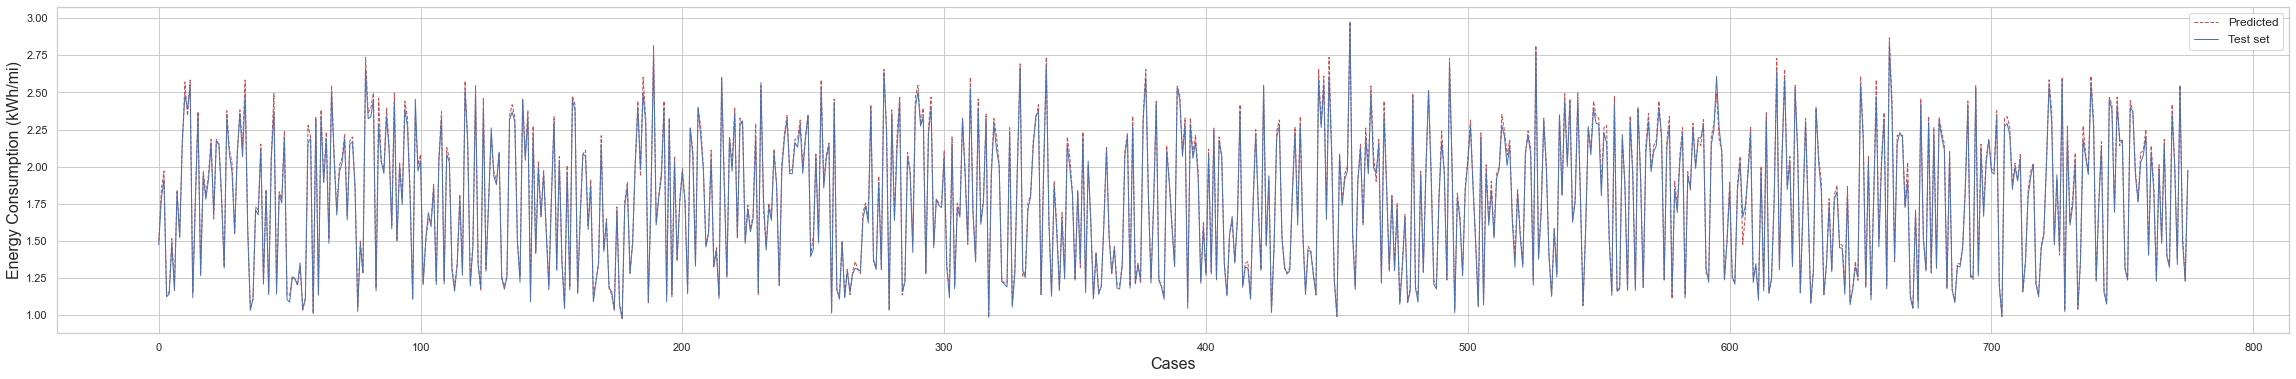

In [ ]:
y_pred = dtr.predict(X_test)
y_rever = MinMaxScaler(feature_range=(np.min(data_learn.iloc[:,0]), np.max(data_learn.iloc[:,0])))
y_pred_rever = y_rever.fit_transform(y_pred.reshape(-1,1))
y_test_rever = y_rever.fit_transform(y_test)

plt.figure(figsize=(40, 6))
plt.xlabel('Cases', fontsize=16)
plt.ylabel('Energy Consumption (kWh/mi)', fontsize=16)
plt.plot(y_pred_rever,'r--', linewidth=1,label = 'Predicted')
plt.plot(y_test_rever,'b', linewidth=1,label = 'Test set')
plt.legend(fontsize=12)
plt.grid(True, which='both')
plt.show()

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=5, activation='tanh',alpha=0.01, \
                    batch_size='auto', learning_rate_init=0.001, \
                    max_iter=100,early_stopping=True).fit(X_train, y_train)
regr.score(X_train, y_train),regr.score(X_test, y_test) #Return the coefficient of determination

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.9590621427310161, 0.9590782928510201)

### bootstrap